# Introduzione al Machine Learning 2023-2024
## Bernardini Jacopo, Ciocca Giorgio, Marini Tommaso
### Exam Project, First Part: Data Exploration, Clustering  and Classification

Libraries import

In [173]:
import numpy as np
import pandas as pd

File reading and substitution of 'notknown' values with NaNs 

In [174]:
filename = r'C:\Users\giorg\Desktop\uni\magistrale\Introduzione al Machine Learning\Project\IML-1\code\data\pums.csv'
data = pd.read_csv(filename, na_values='notknown')
data

,AGEP,SCHL,MAR,RELP,DIS,ESP,CIT,MIG,MIL,ANC,NATIVITY,DEAR,DEYE,DREM,SEX,ESR
0,21.0,16.0,5.0,17.0,2.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,True
1,19.0,16.0,5.0,17.0,2.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,False
2,24.0,12.0,5.0,16.0,1.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,1.0,1.0,False
3,20.0,16.0,5.0,17.0,2.0,0.0,1.0,1.0,3.0,1.0,1.0,2.0,NaN,2.0,2.0,True
4,31.0,17.0,5.0,17.0,2.0,0.0,1.0,3.0,4.0,4.0,1.0,2.0,2.0,2.0,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746331,7.0,4.0,5.0,2.0,2.0,1.0,1.0,1.0,0.0,2.0,1.0,2.0,2.0,2.0,2.0,False
746332,47.0,NaN,1.0,0.0,1.0,0.0,1.0,1.0,4.0,4.0,NaN,1.0,1.0,2.0,1.0,False
746333,35.0,14.0,1.0,1.0,2.0,0.0,1.0,1.0,4.0,4.0,1.0,2.0,2.0,2.0,2.0,False
746334,9.0,7.0,5.0,2.0,2.0,4.0,1.0,1.0,0.0,4.0,1.0,2.0,2.0,2.0,2.0,False


In [175]:
data[data.isnull().sum(axis=1)>1]

,AGEP,SCHL,MAR,RELP,DIS,ESP,CIT,MIG,MIL,ANC,NATIVITY,DEAR,DEYE,DREM,SEX,ESR
89,48.0,19.0,3.0,16.0,2.0,0.0,1.0,3.0,4.0,1.0,NaN,2.0,NaN,2.0,2.0,False
128,64.0,12.0,2.0,NaN,1.0,0.0,1.0,1.0,4.0,1.0,1.0,1.0,NaN,2.0,1.0,False
135,45.0,12.0,5.0,NaN,2.0,0.0,1.0,1.0,4.0,4.0,NaN,2.0,2.0,2.0,1.0,False
212,25.0,19.0,5.0,16.0,2.0,0.0,1.0,3.0,4.0,1.0,NaN,NaN,2.0,2.0,1.0,False
230,92.0,NaN,1.0,16.0,1.0,0.0,1.0,1.0,3.0,1.0,1.0,NaN,2.0,2.0,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746268,59.0,19.0,1.0,0.0,2.0,0.0,1.0,1.0,4.0,1.0,NaN,2.0,NaN,2.0,2.0,True
746277,12.0,9.0,5.0,2.0,2.0,2.0,1.0,1.0,0.0,2.0,NaN,NaN,2.0,2.0,2.0,False
746298,54.0,NaN,1.0,1.0,2.0,0.0,1.0,1.0,4.0,4.0,NaN,2.0,2.0,2.0,1.0,True
746323,63.0,16.0,1.0,1.0,2.0,0.0,NaN,1.0,4.0,1.0,NaN,2.0,2.0,2.0,2.0,True


Replace Boolean target variable with O and 1


In [176]:
data=data.replace({False:0, True:1})
data     = data.infer_objects(copy=False)
data.head()

C:\Users\giorg\AppData\Local\Temp\ipykernel_29980\1575331312.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data=data.replace({False:0, True:1})


,AGEP,SCHL,MAR,RELP,DIS,ESP,CIT,MIG,MIL,ANC,NATIVITY,DEAR,DEYE,DREM,SEX,ESR
0,21.0,16.0,5.0,17.0,2.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,1
1,19.0,16.0,5.0,17.0,2.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,0
2,24.0,12.0,5.0,16.0,1.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,1.0,1.0,0
3,20.0,16.0,5.0,17.0,2.0,0.0,1.0,1.0,3.0,1.0,1.0,2.0,NaN,2.0,2.0,1
4,31.0,17.0,5.0,17.0,2.0,0.0,1.0,3.0,4.0,4.0,1.0,2.0,2.0,2.0,1.0,1


First data check

In [177]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746336 entries, 0 to 746335
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   AGEP      746336 non-null  float64
 1   SCHL      709133 non-null  float64
 2   MAR       746336 non-null  float64
 3   RELP      709213 non-null  float64
 4   DIS       746336 non-null  float64
 5   ESP       746336 non-null  float64
 6   CIT       709287 non-null  float64
 7   MIG       746336 non-null  float64
 8   MIL       746336 non-null  float64
 9   ANC       746336 non-null  float64
 10  NATIVITY  708813 non-null  float64
 11  DEAR      708974 non-null  float64
 12  DEYE      709267 non-null  float64
 13  DREM      746336 non-null  float64
 14  SEX       746336 non-null  float64
 15  ESR       746336 non-null  int64  
dtypes: float64(15), int64(1)
memory usage: 91.1 MB


AGEP            0
SCHL        37203
MAR             0
RELP        37123
DIS             0
ESP             0
CIT         37049
MIG             0
MIL             0
ANC             0
NATIVITY    37523
DEAR        37362
DEYE        37069
DREM            0
SEX             0
ESR             0
dtype: int64

<Axes: >

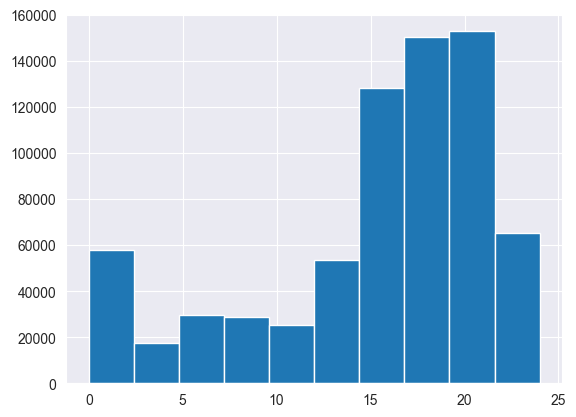

In [178]:
data['SCHL'].hist()

<Axes: >

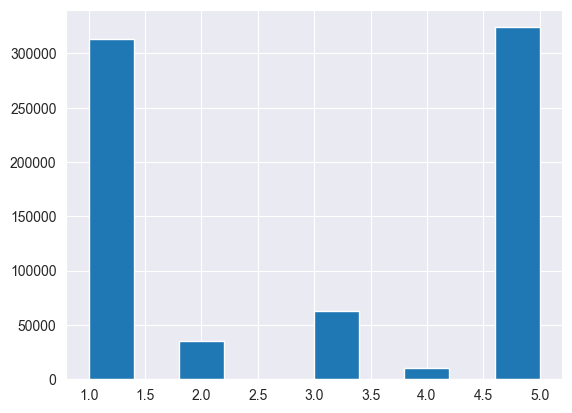

In [179]:
data['MAR'].hist()

AGEP        11.180506
SCHL         7.574009
MAR          4.919363
RELP         7.000000
DIS          1.940136
ESP          3.553844
CIT          1.151597
MIG          1.163442
MIL          0.971637
ANC          1.897107
NATIVITY     1.027226
DEAR         1.992126
DEYE         1.990757
DREM         1.422188
SEX          1.480340
ESR          0.131028
dtype: float64

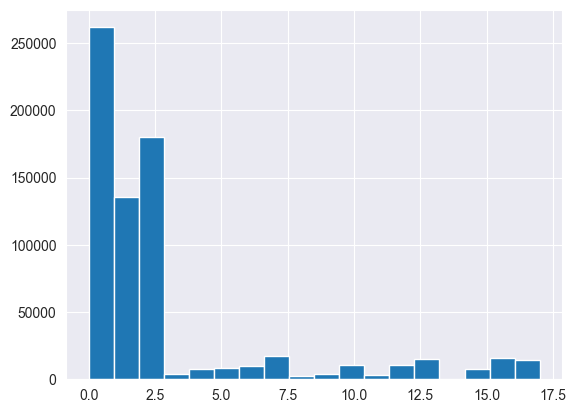

In [180]:
data['RELP'].hist(bins=18)
data[data['RELP']==7].mean()

<Axes: >

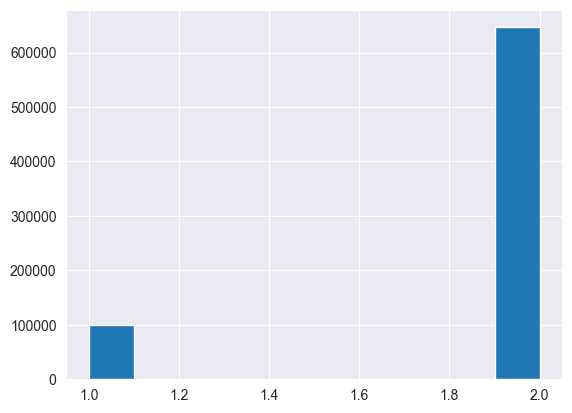

In [181]:
data['DIS'].hist()

<Axes: >

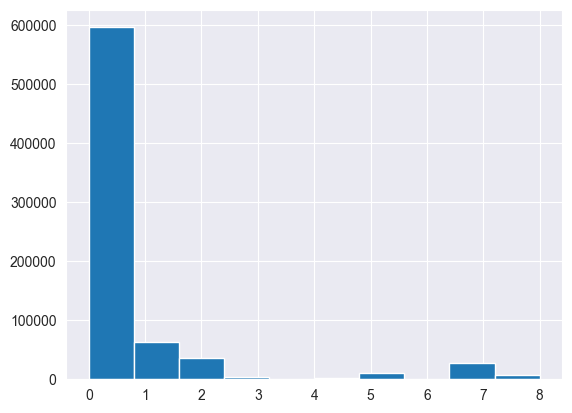

In [182]:
data['ESP'].hist()

<Axes: >

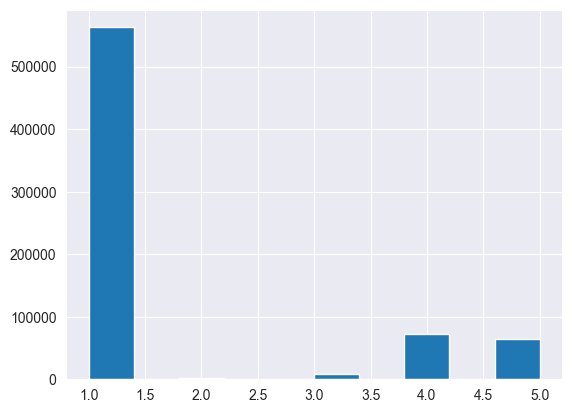

In [183]:
data['CIT'].hist()

<Axes: >

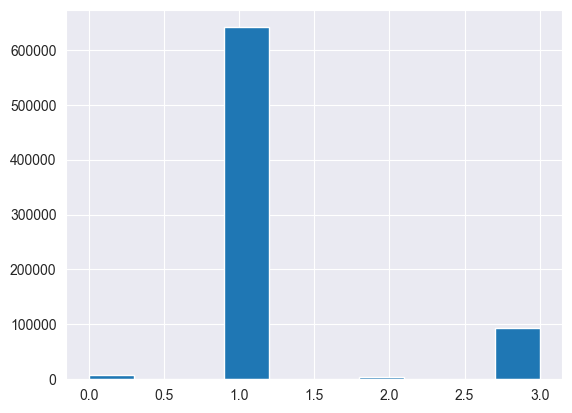

In [184]:
data['MIG'].hist()

<Axes: >

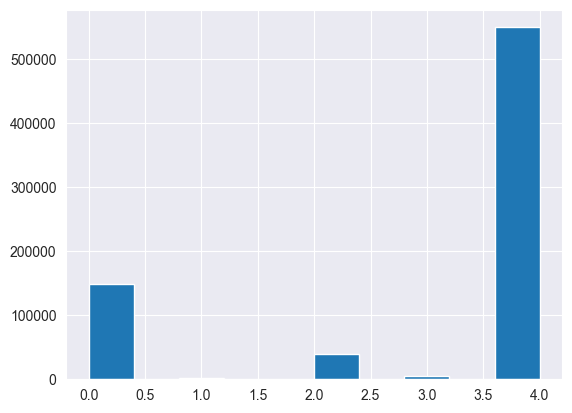

In [185]:
data['MIL'].hist()

<Axes: >

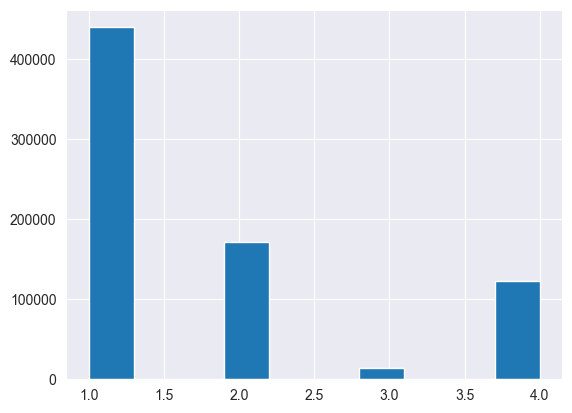

In [186]:
data['ANC'].hist()

<Axes: >

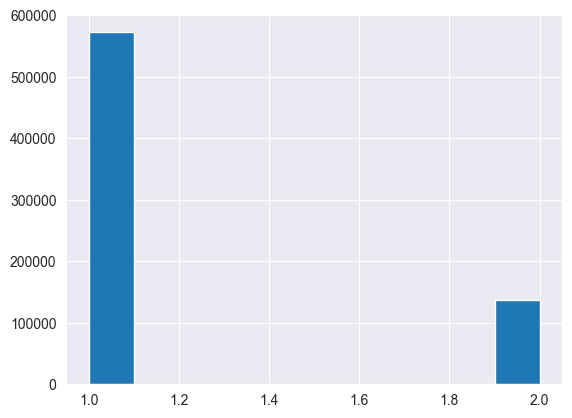

In [187]:
data['NATIVITY'].hist()

<Axes: >

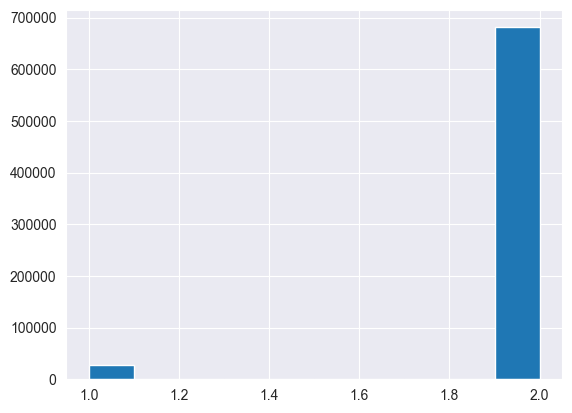

In [188]:
data['DEAR'].hist()

<Axes: >

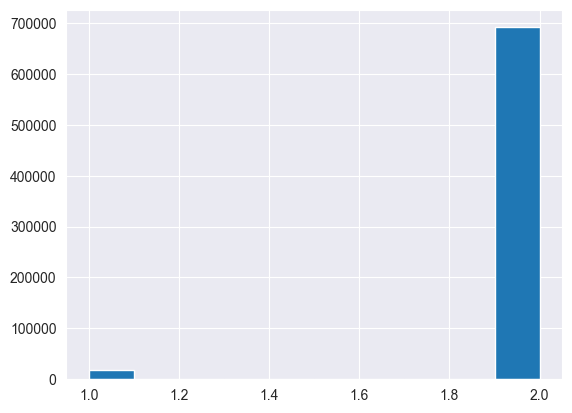

In [189]:
data['DEYE'].hist()

<Axes: >

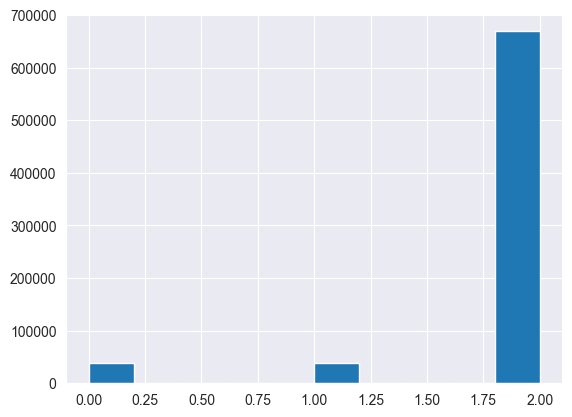

In [190]:
data['DREM'].hist()

<Axes: >

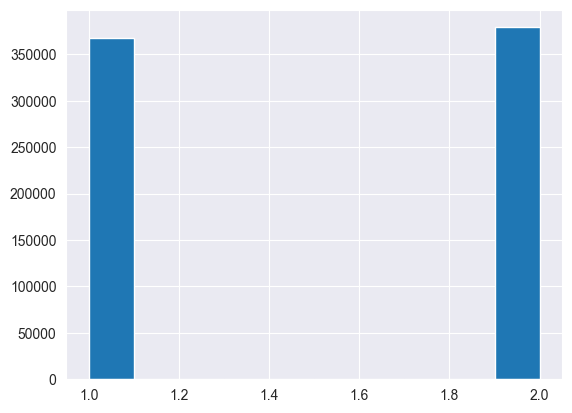

In [191]:
data['SEX'].hist()

<Axes: >

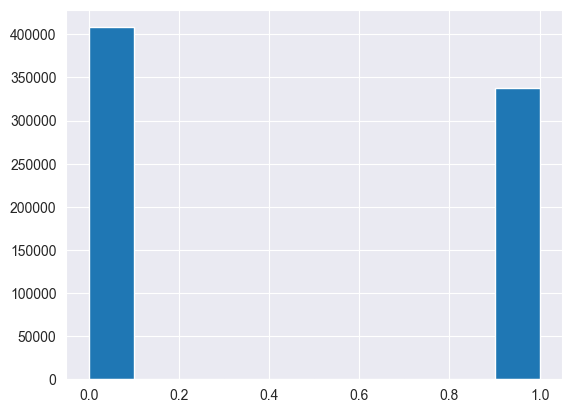

In [192]:
data['ESR'].hist()

In [193]:
data.corr()

,AGEP,SCHL,MAR,RELP,DIS,ESP,CIT,MIG,MIL,ANC,NATIVITY,DEAR,DEYE,DREM,SEX,ESR
AGEP,1.000000,0.526318,-0.652526,-0.160553,-0.319932,-0.495892,0.136805,-0.094053,0.610013,-0.075151,0.159861,-0.240264,-0.127749,0.297545,0.045604,0.108214
SCHL,0.526318,1.000000,-0.437045,-0.106178,-0.034417,-0.534254,0.013117,0.051095,0.710749,-0.055516,0.026687,-0.036743,-0.002851,0.508846,0.020629,0.433160
MAR,-0.652526,-0.437045,1.000000,0.324343,0.084751,0.395482,-0.197440,0.091173,-0.486286,0.067081,-0.212588,0.100159,0.034025,-0.243272,-0.037797,-0.236155
RELP,-0.160553,-0.106178,0.324343,1.000000,-0.090447,0.028915,-0.007710,0.202360,-0.026641,0.051846,-0.018830,-0.004358,-0.043709,-0.090742,-0.041623,-0.141054
DIS,-0.319932,-0.034417,0.084751,-0.090447,1.000000,0.093754,0.037943,-0.000815,-0.102686,-0.006058,0.031085,0.512855,0.405873,0.190759,-0.004698,0.209605
ESP,-0.495892,-0.534254,0.395482,0.028915,0.093754,1.000000,-0.139069,-0.016679,-0.650507,0.037561,-0.145389,0.063005,0.038179,-0.286680,-0.014166,-0.323080
CIT,0.136805,0.013117,-0.197440,-0.007710,0.037943,-0.139069,1.000000,-0.010506,0.210177,-0.154963,0.975068,0.025188,-0.000428,0.109111,0.011768,0.108761
MIG,-0.094053,0.051095,0.091173,0.202360,-0.000815,-0.016679,-0.010506,1.000000,0.041475,0.032566,-0.018573,0.016514,-0.003608,0.034611,-0.011250,0.020511
MIL,0.610013,0.710749,-0.486286,-0.026641,-0.102686,-0.650507,0.210177,0.041475,1.000000,-0.072090,0.217732,-0.041023,-0.047215,0.391905,0.084040,0.455615
ANC,-0.075151,-0.055516,0.067081,0.051846,-0.006058,0.037561,-0.154963,0.032566,-0.072090,1.000000,-0.160468,0.000405,0.001006,-0.050561,0.003481,-0.022187


substituted NaN values of DEYE and DEAR with mode

In [194]:
data['DEYE']=data['DEYE'].fillna(2)
data['DEAR']=data['DEAR'].fillna(2)
data.isna().sum()

AGEP            0
SCHL        37203
MAR             0
RELP        37123
DIS             0
ESP             0
CIT         37049
MIG             0
MIL             0
ANC             0
NATIVITY    37523
DEAR            0
DEYE            0
DREM            0
SEX             0
ESR             0
dtype: int64

dropping every row in which both CIT and NATIVITY are NaNs

In [195]:
cond = data['CIT'].isna() & data['NATIVITY'].isna()
data = data.loc[~cond]

<Axes: >

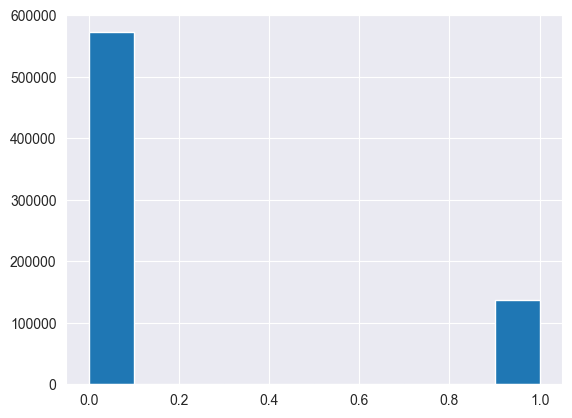

In [196]:
data['NATIVITY'] = data['NATIVITY'] - 1
data['NATIVITY'].hist()

array([[<Axes: xlabel='CIT', ylabel='CIT'>,
        <Axes: xlabel='NATIVITY', ylabel='CIT'>],
       [<Axes: xlabel='CIT', ylabel='NATIVITY'>,
        <Axes: xlabel='NATIVITY', ylabel='NATIVITY'>]], dtype=object)

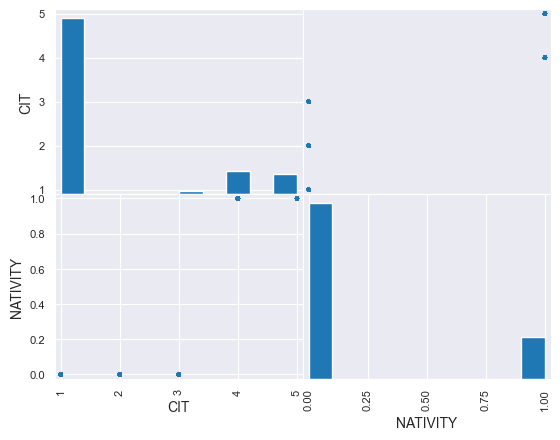

In [197]:
pd.plotting.scatter_matrix(data[['CIT','NATIVITY']])

reconstruction of NAT from CIT

In [198]:
data.loc[(data['NATIVITY'].isnull()) & (data['CIT']<4), 'NATIVITY'] = 0
data.loc[(data['NATIVITY'].isnull()) & (data['CIT']>3), 'NATIVITY'] = 1

checking whether we did everything correctly

array([[<Axes: xlabel='CIT', ylabel='CIT'>,
        <Axes: xlabel='NATIVITY', ylabel='CIT'>],
       [<Axes: xlabel='CIT', ylabel='NATIVITY'>,
        <Axes: xlabel='NATIVITY', ylabel='NATIVITY'>]], dtype=object)

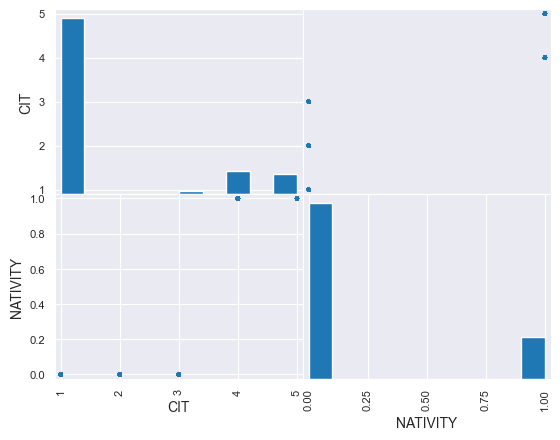

In [199]:
pd.plotting.scatter_matrix(data[['CIT','NATIVITY']])